In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
m1variation=[]
mS0=[]
gX=[]
epsilondark=[]
lambdaphih=[]
Ychi=[]
m1=0.2

In [4]:
for i in range(100):
    m1variation.append(m1+(0.006*i))
    mS0.append(1)
    gX.append(2.213)
    epsilondark.append(0.0001+i*0.0001)
    #lambdaphih.append(0.00000045)
    lambdaphih.append('{:.10f}'.format(0.00000045))
    Ychi.append(0.005)

In [5]:
m1step=np.array(m1variation)
mS0step=np.array(mS0)
gXstep=np.array(gX)
epsilondarkstep=np.array(epsilondark)
lambdaphihstep=np.array(lambdaphih)
Ychistep=np.array(Ychi)

In [6]:
mX0=3*m1step
m2=m1step + m1step*0.3

In [7]:
# Open the file in write mode
with open("database.txt", "w") as file:
    for i in range(100):
        for j in range(100):
            file.write(str(mX0[j]) + " " + str(m1step[j]) + " " + str(m2[j]) + " " + str(mS0step[i]) + " " + str(gXstep[i]) + " " + str(epsilondarkstep[i]) + " " + str(lambdaphihstep[i]) + " " + str(Ychistep[i]) + "\n")
        
        

In [2]:
mass_zeta, mass1, mass2, massS0, massgX, massepsilondark, masslambdaphih, massYchi, Omega = np.loadtxt('data_out', delimiter=' ', unpack=True)


In [3]:
massepsilondark

array([0.0001, 0.0001, 0.0001, ..., 0.01  , 0.01  , 0.01  ])

In [4]:
numberindeces=[]

In [5]:
massepsilondark[10]

0.0001

In [6]:
Omega[3]

0.693393

In [7]:
for i in range(10000):
    if Omega[i]>0.115 and Omega[i] < 0.125:
        numberindeces.append(i)

In [8]:
numberindeces

[21,
 90,
 91,
 92,
 121,
 191,
 192,
 221,
 291,
 292,
 320,
 391,
 392,
 393,
 419,
 420,
 491,
 492,
 493,
 518,
 519,
 592,
 593,
 600,
 601,
 617,
 692,
 693,
 694,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 793,
 794,
 795,
 893,
 894,
 895,
 994,
 995,
 996,
 1095,
 1096,
 1097,
 1196,
 1197,
 1198,
 1297,
 1298,
 1299,
 1398,
 1399,
 1499]

In [9]:
print(numberindeces)

[21, 90, 91, 92, 121, 191, 192, 221, 291, 292, 320, 391, 392, 393, 419, 420, 491, 492, 493, 518, 519, 592, 593, 600, 601, 617, 692, 693, 694, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 793, 794, 795, 893, 894, 895, 994, 995, 996, 1095, 1096, 1097, 1196, 1197, 1198, 1297, 1298, 1299, 1398, 1399, 1499]


In [10]:
mass1

array([0.2  , 0.206, 0.212, ..., 0.782, 0.788, 0.794])

In [11]:
x=[]
y=[]
for i in range(len(numberindeces)):
    x.append(mass1[numberindeces[i]])
    y.append(massepsilondark[numberindeces[i]])

In [12]:
x.sort()
y.sort()

In [13]:
print(x)

[0.2, 0.20600000000000002, 0.23, 0.23600000000000002, 0.24200000000000002, 0.248, 0.254, 0.26, 0.266, 0.272, 0.278, 0.28400000000000003, 0.29000000000000004, 0.30200000000000005, 0.308, 0.314, 0.314, 0.32, 0.32, 0.326, 0.326, 0.326, 0.74, 0.746, 0.746, 0.746, 0.746, 0.746, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.752, 0.758, 0.758, 0.758, 0.758, 0.758, 0.758, 0.764, 0.764, 0.764, 0.764, 0.77, 0.77, 0.77, 0.77, 0.776, 0.776, 0.776, 0.782, 0.782, 0.782, 0.788, 0.788, 0.788, 0.794, 0.794, 0.794]


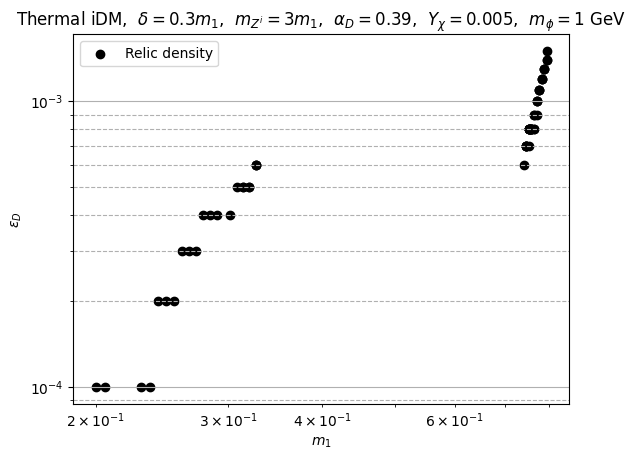

In [14]:
plt.scatter(x, y, label='Relic density',color = "black")
plt.title(r'Thermal iDM,  $\delta= 0.3m_1$,  $m_{Z^i}=3m_1$,  $\alpha_D=0.39$,  $Y_\chi=0.005$,  $m_\phi=1$ GeV')
plt.xlabel('$m_1$')
plt.ylabel('$\epsilon_D$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(which='major')
plt.grid(which='minor', axis='y',linestyle='--')
plt.show()

In [31]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a function to fit the data
def func(xdata, a, b, c, d):
    return a + b*xdata + c*xdata**2 + d*xdata**3

In [32]:
popt, pcov = curve_fit(func, x, y,p0=(0,0,0,0))

In [33]:
popt

array([-0.0095424 ,  0.0741337 , -0.16316429,  0.12730641])

In [38]:
def fittone(xdata): 
    return func(xdata,a=popt[0],b=popt[1],c=popt[2], d=popt[3]) 

In [41]:
prova=np.linspace(0.2,0.8,100)

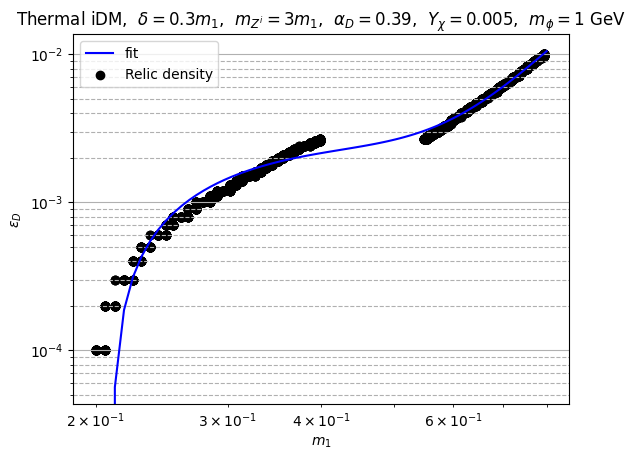

In [48]:
plt.plot(prova, fittone(prova), 'b-', label='fit')
plt.scatter(x, y, label='Relic density',color = "black")
plt.title(r'Thermal iDM,  $\delta= 0.3m_1$,  $m_{Z^i}=3m_1$,  $\alpha_D=0.39$,  $Y_\chi=0.005$,  $m_\phi=1$ GeV')
plt.xlabel('$m_1$')
plt.ylabel('$\epsilon_D$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(which='major')
plt.grid(which='minor', axis='y',linestyle='--')